# Data Exploration

In [1]:
import collections
import csv
import os
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

In [2]:
########################################
############ DATA VARIABLES ############
########################################

DOMAINS = [
    'apparel',
    'automotive',
    'baby',
    'beauty',
    'books',
    'camera_photo',
    'cell_phones_service',
    'computer_video_games',
    'dvd',
    'electronics',
    'gourmet_food',
    'grocery',
    'health_personal_care',
    'jewelry_watches',
    'kitchen_housewares',
    'magazines',
    'music',
    'musical_instruments',
    'office_products',
    'outdoor_living',
    'software',
    'sports_outdoors',
    'tools_hardware',
    'toys_games',
    'video',
]
LABEL_TYPE = [
    't2',
    't4',
    't5'
]
SPLITS = [
    'train',
    'dev',
    'test'
]

In [3]:
########################################
############# DATA READING #############
########################################

vocabulary = set()
examples = collections.defaultdict(list)

num_keys = 0

for domain in DOMAINS:
    for label_type in LABEL_TYPE:
        for split in SPLITS:
            filename = './data/{}.{}.{}'.format(domain, label_type, split)
            key = './preprocessed_data/{}.{}.{}'.format(domain, label_type, split)
            num_keys += 1
            with open(filename, 'r') as file:
                for line in file:
                    line = line.split()
                    examples[key].append(line)
                    for word in line[:-1]: 
                        if word.isalpha(): vocabulary.add(word)

print("Number of distinct corpora: ", num_keys)

Number of distinct corpora:  225


In [7]:
########################################
############## ASSIGN IDS ##############
########################################

VOCAB_IDS = {'UNK' : len(vocabulary) + 1}
for i, word in enumerate(sorted(vocabulary)):
    VOCAB_IDS[word] = i+1

print("Number of unique words: ", len(VOCAB_IDS))         

Number of unique words:  138397


In [8]:
###########################################
# CONSTRUCT ID EXAMPLES AND WRITE TO FILE #
###########################################

num_positive_labels = 0
num_negative_labels = 0

new_examples = collections.defaultdict(list)
for filename, reviews in examples.items():
        for ex in reviews:
            words, label = ex[:-1], ex[-1]
            if label == '1':
                num_positive_labels += 1
            else:
                num_negative_labels += 1

print("num_positive_labels in entire dataset:", num_positive_labels)
print("num_negative_labels in entire dataset:", num_negative_labels)
            

num_positive_labels in entire dataset: 108317
num_negative_labels in entire dataset: 30055


In [9]:
###########################################
# DETERMINE SIXE OF EACH CORPORA SPLIT #
###########################################
for filename, reviews in examples.items():
    print("Number of examples in ", filename, "-->", len(reviews))

Number of examples in  ./preprocessed_data/apparel.t2.train --> 2466
Number of examples in  ./preprocessed_data/apparel.t2.dev --> 308
Number of examples in  ./preprocessed_data/apparel.t2.test --> 309
Number of examples in  ./preprocessed_data/apparel.t4.train --> 2466
Number of examples in  ./preprocessed_data/apparel.t4.dev --> 309
Number of examples in  ./preprocessed_data/apparel.t4.test --> 309
Number of examples in  ./preprocessed_data/apparel.t5.train --> 2466
Number of examples in  ./preprocessed_data/apparel.t5.dev --> 309
Number of examples in  ./preprocessed_data/apparel.t5.test --> 310
Number of examples in  ./preprocessed_data/automotive.t2.train --> 200
Number of examples in  ./preprocessed_data/automotive.t2.dev --> 23
Number of examples in  ./preprocessed_data/automotive.t2.test --> 22
Number of examples in  ./preprocessed_data/automotive.t4.train --> 200
Number of examples in  ./preprocessed_data/automotive.t4.dev --> 23
Number of examples in  ./preprocessed_data/auto

In [10]:
###########################################
# CORPORA STATS (NO SPLIT) #
###########################################
corpora_size_dict = {} # key: domain -> val: dataset size
corpora_distribution_dict = {} # key: domain -> val: {"1": #positive, "-1": #negative}

for filename, reviews in examples.items():
    info_lst = filename[filename.rfind('/') + 1:].split(".")
    domain, label_type, split = tuple(info_lst)
    if domain not in corpora_size_dict:
        corpora_size_dict[domain] = 0
    corpora_size_dict[domain] += len(reviews)
    for ex in reviews:
            words, label = ex[:-1], ex[-1]
            if domain not in corpora_distribution_dict:
                corpora_distribution_dict[domain] = collections.defaultdict(int)
            corpora_distribution_dict[domain][label] += 1
    
for domain, num_examples_in_domain in corpora_size_dict.items():
    print("domain:",domain,"num_examples:",num_examples_in_domain)
    

domain: apparel num_examples: 9252
domain: automotive num_examples: 736
domain: baby num_examples: 4256
domain: beauty num_examples: 2884
domain: books num_examples: 4955
domain: camera_photo num_examples: 7408
domain: cell_phones_service num_examples: 1023
domain: computer_video_games num_examples: 2771
domain: dvd num_examples: 5066
domain: electronics num_examples: 4608
domain: gourmet_food num_examples: 1575
domain: grocery num_examples: 2632
domain: health_personal_care num_examples: 7225
domain: jewelry_watches num_examples: 1981
domain: kitchen_housewares num_examples: 3998
domain: magazines num_examples: 4189
domain: music num_examples: 25076
domain: musical_instruments num_examples: 332
domain: office_products num_examples: 431
domain: outdoor_living num_examples: 1599
domain: software num_examples: 2390
domain: sports_outdoors num_examples: 5727
domain: tools_hardware num_examples: 112
domain: toys_games num_examples: 13147
domain: video num_examples: 24999


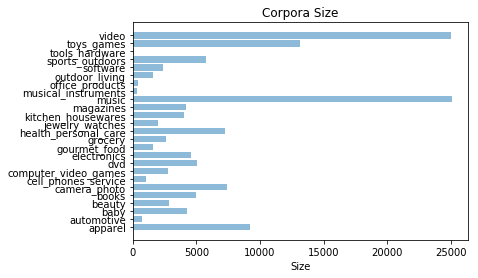

In [11]:
domains = list(corpora_size_dict.keys())
y_pos = np.arange(len(domains))
sizes = list(corpora_size_dict.values())

plt.barh(y_pos, sizes, align='center', alpha=0.5)
plt.yticks(y_pos, domains)
plt.xlabel('Size')
plt.title('Corpora Size')
plt.show()

In [12]:
for domain, label_dict in corpora_distribution_dict.items():
    print("domain:",domain,"label_dict:",label_dict)

domain: apparel label_dict: defaultdict(<class 'int'>, {'-1': 1823, '1': 7429})
domain: automotive label_dict: defaultdict(<class 'int'>, {'-1': 192, '1': 544})
domain: baby label_dict: defaultdict(<class 'int'>, {'-1': 1124, '1': 3132})
domain: beauty label_dict: defaultdict(<class 'int'>, {'-1': 592, '1': 2292})
domain: books label_dict: defaultdict(<class 'int'>, {'1': 4010, '-1': 945})
domain: camera_photo label_dict: defaultdict(<class 'int'>, {'-1': 1573, '1': 5835})
domain: cell_phones_service label_dict: defaultdict(<class 'int'>, {'1': 594, '-1': 429})
domain: computer_video_games label_dict: defaultdict(<class 'int'>, {'-1': 588, '1': 2183})
domain: dvd label_dict: defaultdict(<class 'int'>, {'1': 4022, '-1': 1044})
domain: electronics label_dict: defaultdict(<class 'int'>, {'1': 3330, '-1': 1278})
domain: gourmet_food label_dict: defaultdict(<class 'int'>, {'-1': 268, '1': 1307})
domain: grocery label_dict: defaultdict(<class 'int'>, {'-1': 433, '1': 2199})
domain: health_pe

domain: apparel label_dict: defaultdict(<class 'int'>, {'-1': 1823, '1': 7429})


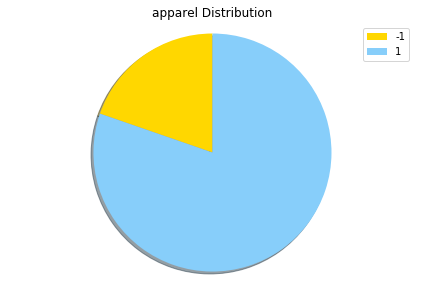

domain: automotive label_dict: defaultdict(<class 'int'>, {'-1': 192, '1': 544})


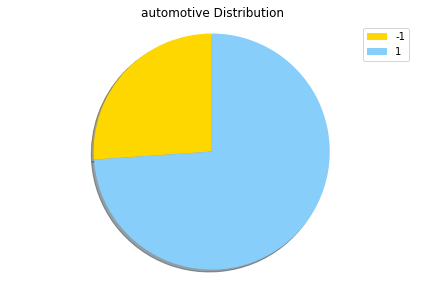

domain: baby label_dict: defaultdict(<class 'int'>, {'-1': 1124, '1': 3132})


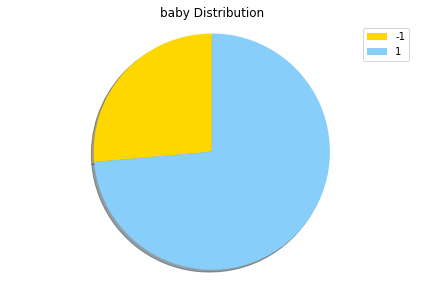

domain: beauty label_dict: defaultdict(<class 'int'>, {'-1': 592, '1': 2292})


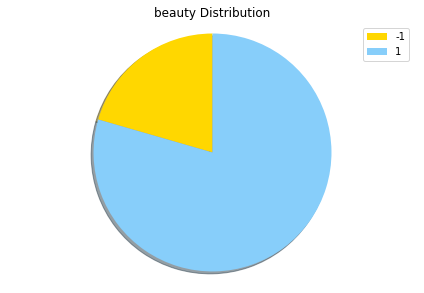

domain: books label_dict: defaultdict(<class 'int'>, {'1': 4010, '-1': 945})


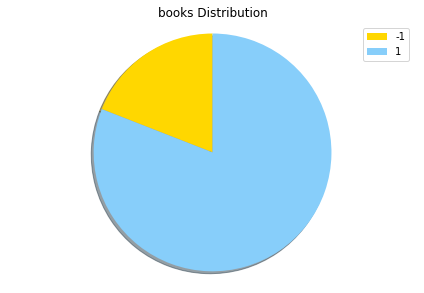

domain: camera_photo label_dict: defaultdict(<class 'int'>, {'-1': 1573, '1': 5835})


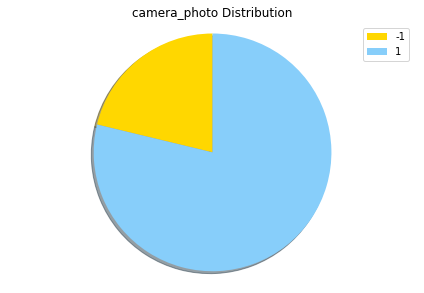

domain: cell_phones_service label_dict: defaultdict(<class 'int'>, {'1': 594, '-1': 429})


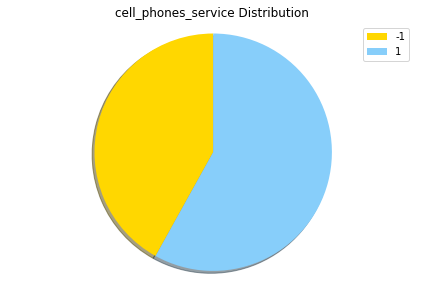

domain: computer_video_games label_dict: defaultdict(<class 'int'>, {'-1': 588, '1': 2183})


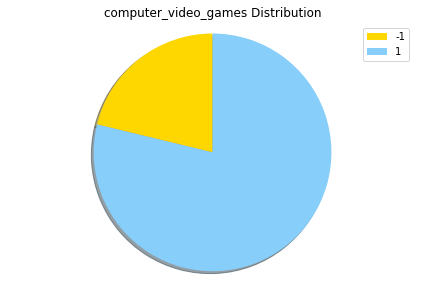

domain: dvd label_dict: defaultdict(<class 'int'>, {'1': 4022, '-1': 1044})


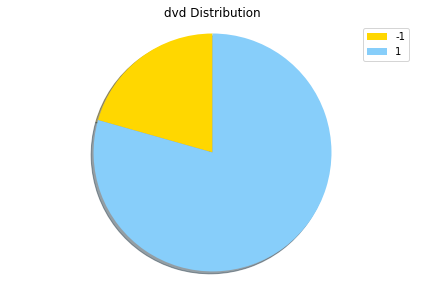

domain: electronics label_dict: defaultdict(<class 'int'>, {'1': 3330, '-1': 1278})


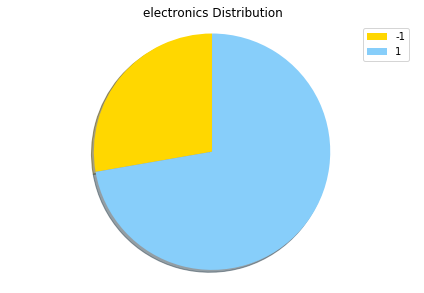

domain: gourmet_food label_dict: defaultdict(<class 'int'>, {'-1': 268, '1': 1307})


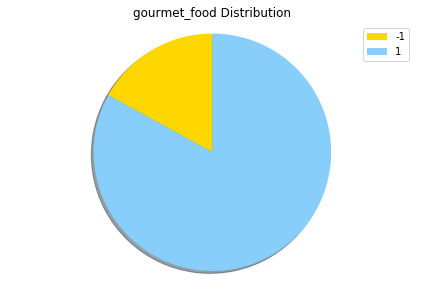

domain: grocery label_dict: defaultdict(<class 'int'>, {'-1': 433, '1': 2199})


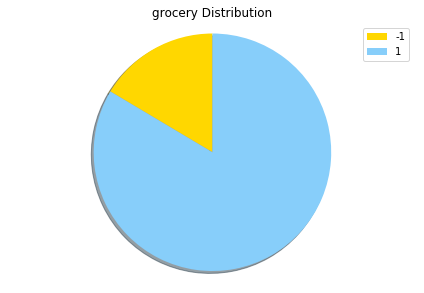

domain: health_personal_care label_dict: defaultdict(<class 'int'>, {'-1': 1834, '1': 5391})


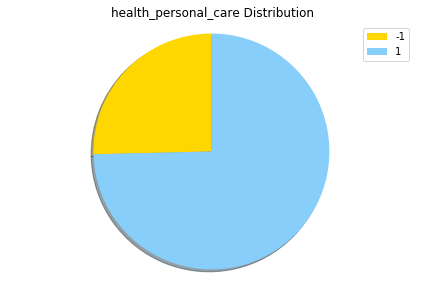

domain: jewelry_watches label_dict: defaultdict(<class 'int'>, {'1': 1562, '-1': 419})


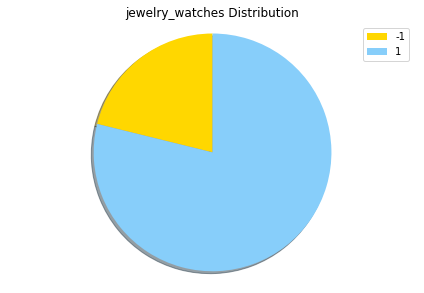

domain: kitchen_housewares label_dict: defaultdict(<class 'int'>, {'1': 3054, '-1': 944})


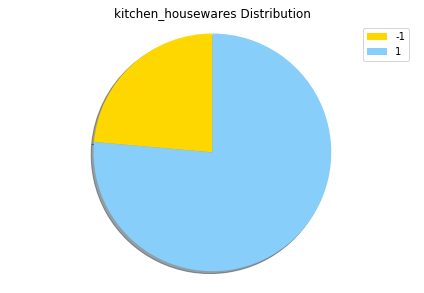

domain: magazines label_dict: defaultdict(<class 'int'>, {'1': 3075, '-1': 1114})


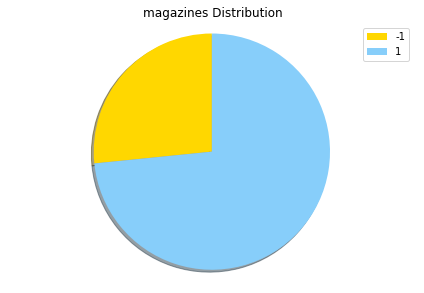

domain: music label_dict: defaultdict(<class 'int'>, {'1': 21506, '-1': 3570})


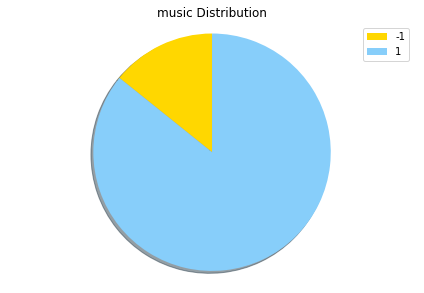

domain: musical_instruments label_dict: defaultdict(<class 'int'>, {'-1': 78, '1': 254})


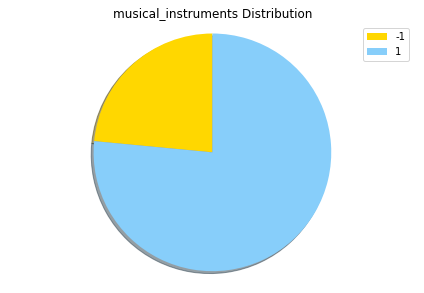

domain: office_products label_dict: defaultdict(<class 'int'>, {'-1': 83, '1': 348})


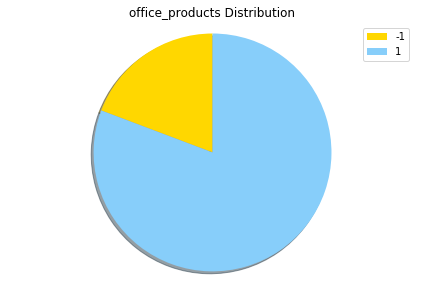

domain: outdoor_living label_dict: defaultdict(<class 'int'>, {'1': 1182, '-1': 417})


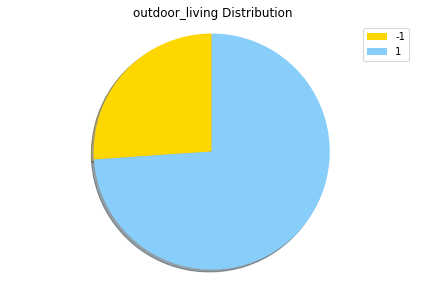

domain: software label_dict: defaultdict(<class 'int'>, {'-1': 998, '1': 1392})


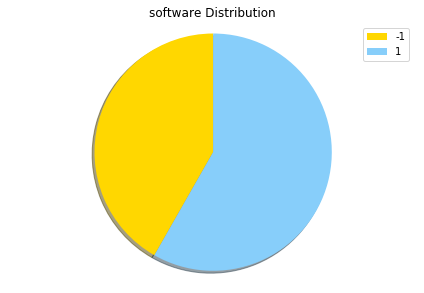

domain: sports_outdoors label_dict: defaultdict(<class 'int'>, {'1': 4328, '-1': 1399})


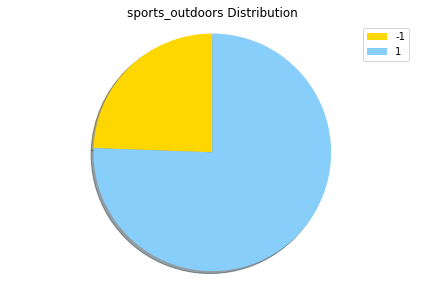

domain: tools_hardware label_dict: defaultdict(<class 'int'>, {'1': 89, '-1': 23})


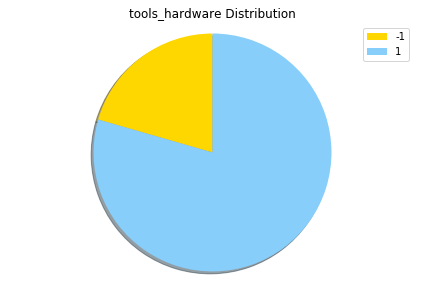

domain: toys_games label_dict: defaultdict(<class 'int'>, {'-1': 3306, '1': 9841})


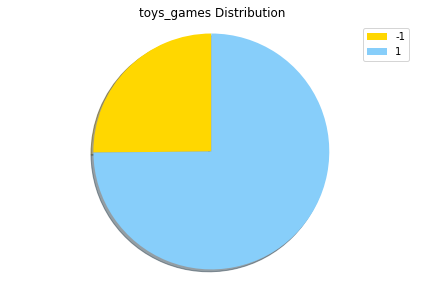

domain: video label_dict: defaultdict(<class 'int'>, {'1': 19418, '-1': 5581})


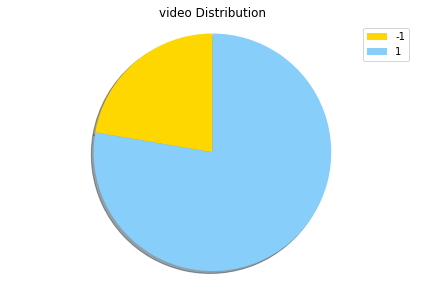

In [13]:
for domain, label_dict in corpora_distribution_dict.items():
    print("domain:",domain,"label_dict:",label_dict)
    labels = list(sorted(label_dict.keys()))
    counts = [label_dict[k] for k in labels]
    colors = [ 'gold', 'lightskyblue']
    patches, texts = plt.pie(counts, colors=colors, shadow=True, startangle=90)
    plt.legend(patches, labels, loc="best")
    plt.axis('equal')
    plt.tight_layout()
    plt.title(domain + ' Distribution')
    plt.show()

{'apparel': 0.19703847816688283, 'automotive': 0.2608695652173913, 'baby': 0.2640977443609023, 'beauty': 0.20527045769764216, 'books': 0.19071644803229063, 'camera_photo': 0.2123380129589633, 'cell_phones_service': 0.41935483870967744, 'computer_video_games': 0.21219776254059905, 'dvd': 0.20607974733517567, 'electronics': 0.27734375, 'gourmet_food': 0.17015873015873015, 'grocery': 0.16451367781155016, 'health_personal_care': 0.25384083044982697, 'jewelry_watches': 0.2115093387178193, 'kitchen_housewares': 0.23611805902951477, 'magazines': 0.26593459059441393, 'music': 0.14236720370074973, 'musical_instruments': 0.23493975903614459, 'office_products': 0.1925754060324826, 'outdoor_living': 0.2607879924953096, 'software': 0.4175732217573222, 'sports_outdoors': 0.24428147372097084, 'tools_hardware': 0.20535714285714285, 'toys_games': 0.25146421236784056, 'video': 0.22324892995719828}


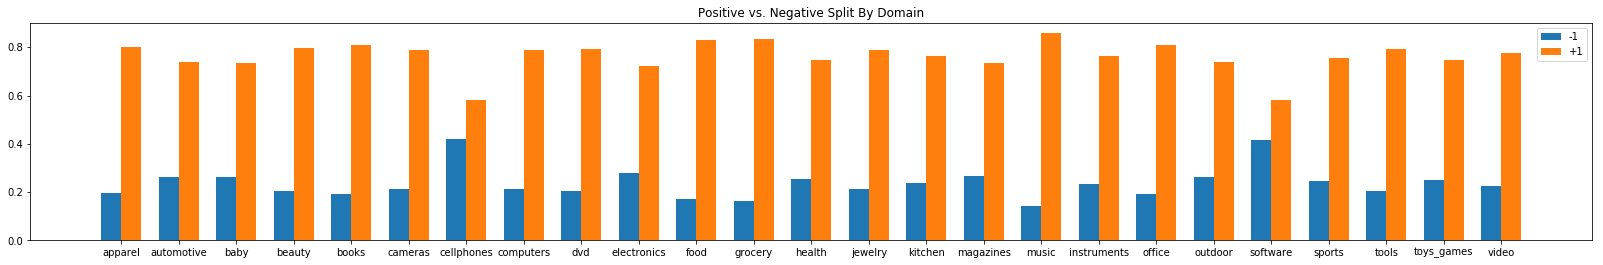

In [56]:
########################################
######### Domain Distributions #########
########################################
distributions = {}
for domain, label_dict in corpora_distribution_dict.items():
    negative, positive = label_dict['-1'], label_dict['1']
    percent_negative = negative / (negative+positive)
    distributions[domain] = percent_negative
print(distributions)

# Bar Chart

DOMAIN_LABELS = [
    'apparel',
    'automotive',
    'baby',
    'beauty',
    'books',
    'cameras',
    'cellphones',
    'computers',
    'dvd',
    'electronics',
    'food',
    'grocery',
    'health',
    'jewelry',
    'kitchen',
    'magazines',
    'music',
    'instruments',
    'office',
    'outdoor',
    'software',
    'sports',
    'tools',
    'toys_games',
    'video',
]

N = len(DOMAIN_LABELS)
negative_percentages = [neg for domain, neg in distributions.items()]
positive_percentages = [1-neg for neg in negative_percentages]

plt.rcParams["figure.figsize"] = [28,4]
fig, ax = plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.35        # the width of the bars
p1 = ax.bar(ind, negative_percentages, width, bottom=0)
p2 = ax.bar(ind + width, positive_percentages, width, bottom=0)

ax.set_title('Positive vs. Negative Split By Domain')
ax.set_xticks(ind + width / 2)
X_labels = []
ax.set_xticklabels(tuple(DOMAIN_LABELS))

ax.legend((p1[0], p2[0]), ('-1', '+1'))
ax.autoscale_view()

plt.savefig('domain_split_bar_chart.png')
plt.show()